In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
songs = pd.read_csv('/Users/merlesteffen/Documents/GitHub/Moosic/Data/playlists.csv', index_col=[0,1])

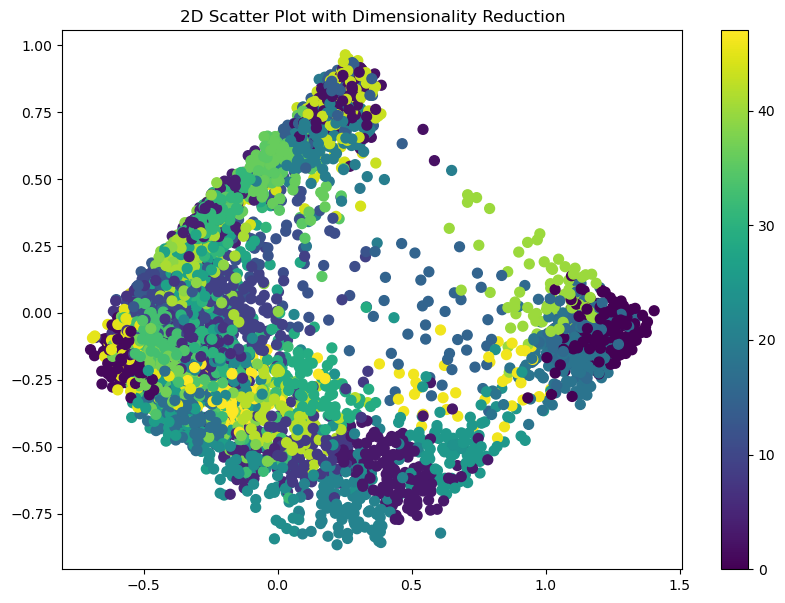

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Assuming 'songs' is your dataframe and it's already loaded
features = songs.drop('cluster', axis=1)

# Using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Using t-SNE as an alternative
# tsne = TSNE(n_components=2)
# reduced_features = tsne.fit_transform(features)

plt.figure(figsize=(10,7))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=songs['cluster'], cmap='viridis', s=50)
plt.colorbar()
plt.title("2D Scatter Plot with Dimensionality Reduction")
plt.show()


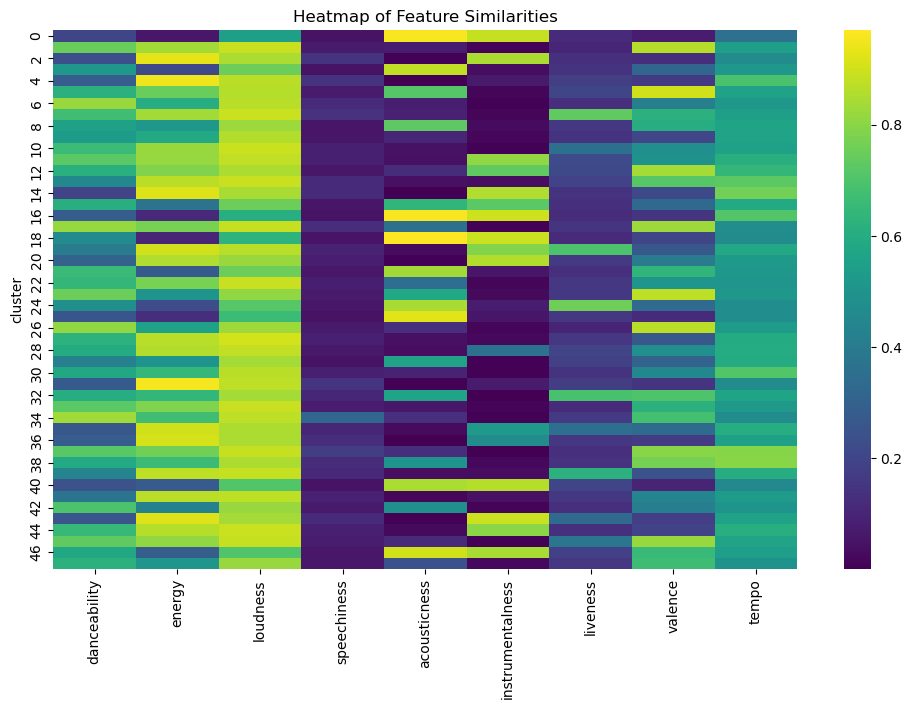

In [5]:
import seaborn as sns

cluster_means = songs.groupby('cluster').mean()
plt.figure(figsize=(12,7))
sns.heatmap(cluster_means, cmap='viridis')
plt.title("Heatmap of Feature Similarities")
plt.show()

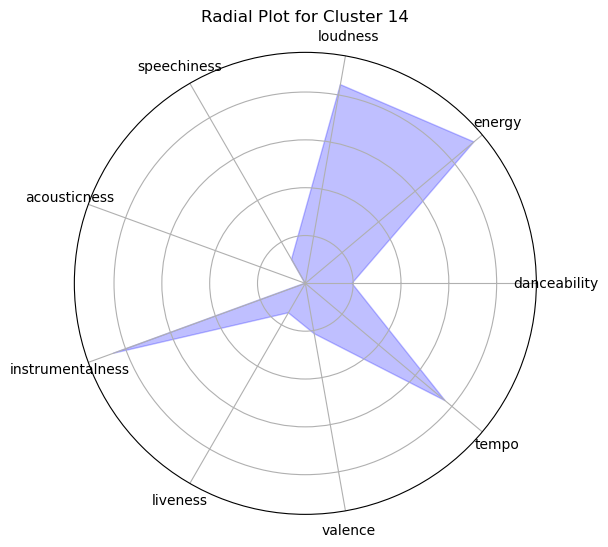

In [16]:
def plot_radial(cluster_number):
    labels = features.columns
    num_vars = len(labels)
    
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    plot_angles = angles + angles[:1]  # Add the start angle to the end to close the circle
    
    values = cluster_means.loc[cluster_number].values.tolist()
    plot_values = values + values[:1]  # Repeat the first value to close the circle
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(plot_angles, plot_values, color='blue', alpha=0.25)
    ax.set_yticklabels([])
    ax.set_xticks(angles)  # Here, use the original angles without the added value
    ax.set_xticklabels(labels)  # Use the original labels
    
    title = "Radial Plot for Cluster " + str(cluster_number)
    ax.set_title(title, position=(0.5, 1.1), ha='center')
    
    plt.show()

# Plot for specific clusters, for example, cluster 1:
plot_radial(14)

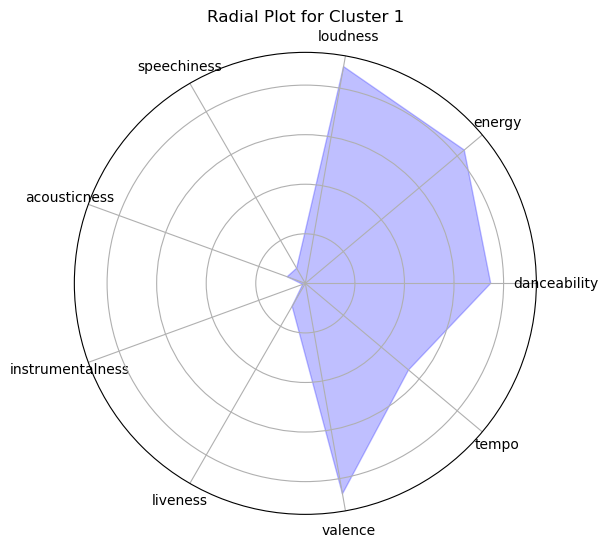

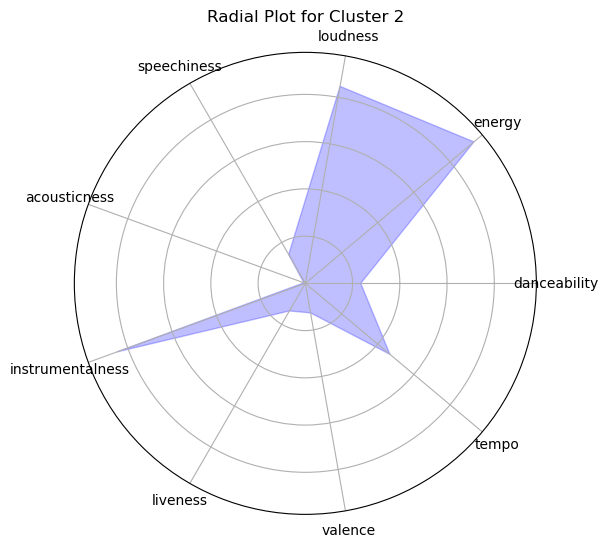

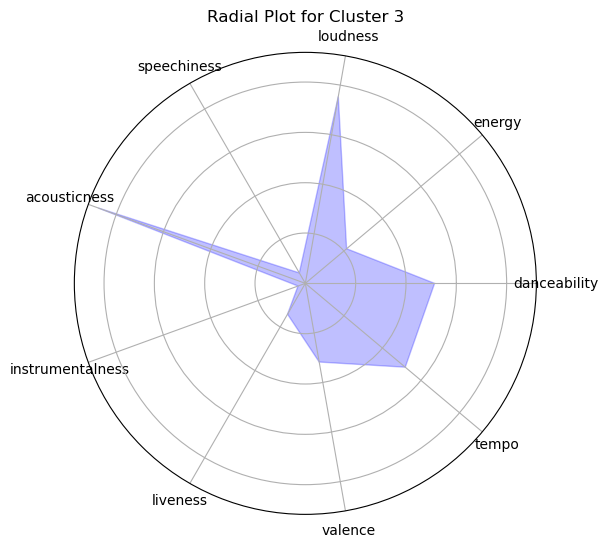

In [18]:
for i in range(1,4):
    plot_radial(i)

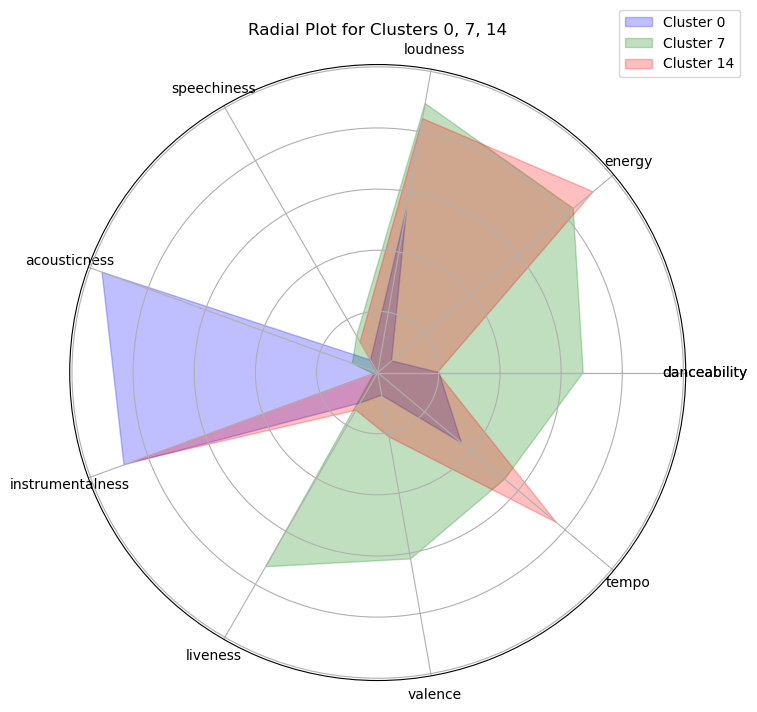

In [24]:
def plot_radial_multi(clusters):
    labels = features.columns
    num_vars = len(labels)
    
    # Set angles for the radial plot
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Add the start angle to the end to close the circle
    
    # Add an extra label to match the tick locations
    extended_labels = list(labels) + [labels[0]]
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    colors = ['blue', 'green', 'red']  # Colors for the clusters. Extend this list if you want more clusters.
    
    for i, cluster_number in enumerate(clusters):
        values = cluster_means.loc[cluster_number].values.tolist()
        values += values[:1]  # Repeat the first value to close the circle
        ax.fill(angles, values, color=colors[i], alpha=0.25, label="Cluster " + str(cluster_number))
    
    ax.set_yticklabels([])
    ax.set_xticks(angles)
    ax.set_xticklabels(extended_labels)
    
    title = "Radial Plot for Clusters " + ', '.join(map(str, clusters))
    ax.set_title(title, position=(0.5, 1.1), ha='center')
    
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    
    plt.show()

# Plot for clusters of your choice, for example, clusters 1, 2, and 3:
plot_radial_multi([0, 7, 14])